# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [395]:
#read the data

data_path = 'E:\countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [396]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [397]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [398]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [399]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-Null Values           <br>
2-datatype           <br>
3-outliers           <br>

In [400]:
#make a copy for the original dataset
df_copy=df.copy()

In [401]:
df_copy.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [402]:
df_copy.columns[4:]

Index(['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [403]:
#replace all fraction numbers with . instead of , and convert the type to float
df_copy1 = df_copy[df_copy.columns[4:]].replace('[,]','.',regex=True).astype(float).reset_index()

In [404]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               227 non-null    int64  
 1   Pop. Density (per sq. mi.)          227 non-null    float64
 2   Coastline (coast/area ratio)        227 non-null    float64
 3   Net migration                       224 non-null    float64
 4   Infant mortality (per 1000 births)  224 non-null    float64
 5   GDP ($ per capita)                  226 non-null    float64
 6   Literacy (%)                        209 non-null    float64
 7   Phones (per 1000)                   223 non-null    float64
 8   Arable (%)                          225 non-null    float64
 9   Crops (%)                           225 non-null    float64
 10  Other (%)                           225 non-null    float64
 11  Climate                             205 non-n

In [405]:
df_copy = df_copy[df_copy.columns[:4]].join(df_copy1)

In [406]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   index                               227 non-null    int64  
 5   Pop. Density (per sq. mi.)          227 non-null    float64
 6   Coastline (coast/area ratio)        227 non-null    float64
 7   Net migration                       224 non-null    float64
 8   Infant mortality (per 1000 births)  224 non-null    float64
 9   GDP ($ per capita)                  226 non-null    float64
 10  Literacy (%)                        209 non-null    float64
 11  Phones (per 1000)                   223 non-n

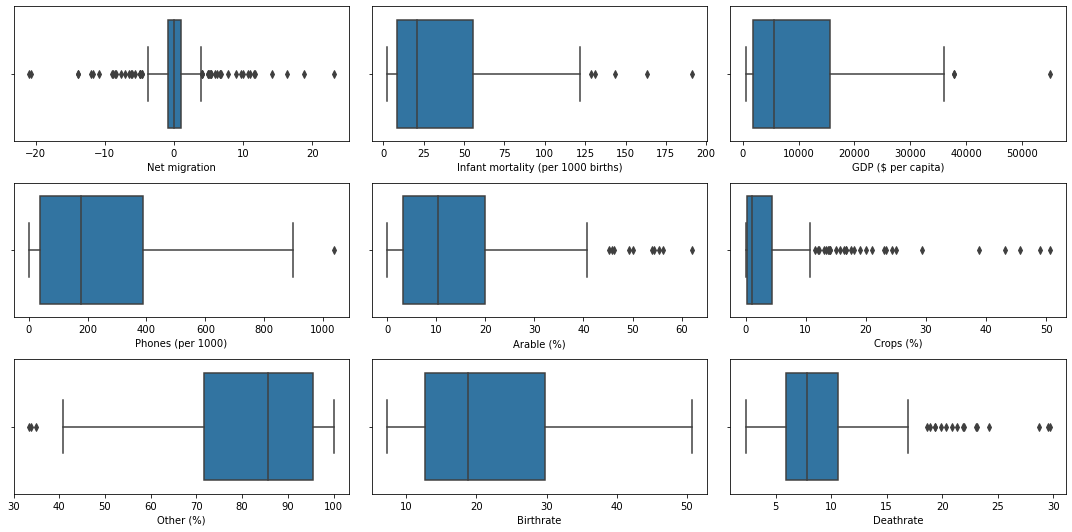

In [407]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_copy['Net migration'], ax = axs[0,0])
plt2 = sns.boxplot(df_copy['Infant mortality (per 1000 births)'], ax = axs[0,1])
plt3 = sns.boxplot(df_copy['GDP ($ per capita)'], ax = axs[0,2])
plt4 = sns.boxplot(df_copy['Phones (per 1000)'], ax = axs[1,0])
plt5 = sns.boxplot(df_copy['Arable (%)'], ax = axs[1,1])
plt6 = sns.boxplot(df_copy['Crops (%)'], ax = axs[1,2])
plt7 = sns.boxplot(df_copy['Other (%)'], ax = axs[2,0])
plt8 = sns.boxplot(df_copy['Birthrate'], ax = axs[2,1])
plt9 = sns.boxplot(df_copy['Deathrate'], ax = axs[2,2])

plt.tight_layout()

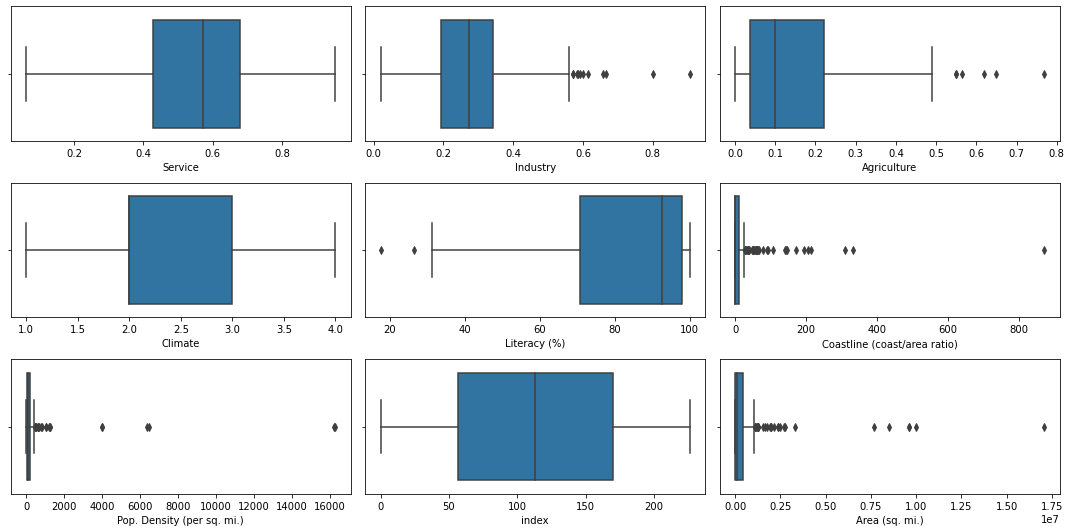

In [408]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_copy['Service'], ax = axs[0,0])
plt2 = sns.boxplot(df_copy['Industry'], ax = axs[0,1])
plt3 = sns.boxplot(df_copy['Agriculture'], ax = axs[0,2])
plt4 = sns.boxplot(df_copy['Climate'], ax = axs[1,0])
plt5 = sns.boxplot(df_copy['Literacy (%)'], ax = axs[1,1])
plt6 = sns.boxplot(df_copy['Coastline (coast/area ratio)'], ax = axs[1,2])
plt7 = sns.boxplot(df_copy['Pop. Density (per sq. mi.)'], ax = axs[2,0])
plt8 = sns.boxplot(df_copy['index'], ax = axs[2,1])
plt9 = sns.boxplot(df_copy['Area (sq. mi.)'], ax = axs[2,2])

plt.tight_layout()

In [409]:
#test 
df_copy['Net migration']= df_copy['Net migration'].fillna(df_copy['Net migration'].mean())
df_copy

,Country,Region,Population,Area (sq. mi.),index,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,0,48.0,0.00,23.060000,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,1,124.6,1.26,-4.930000,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,2,13.8,0.04,-0.390000,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,3,290.4,58.29,-20.710000,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,4,152.1,0.00,6.600000,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,222,419.9,0.00,2.980000,19.62,800.0,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,223,1.0,0.42,0.038125,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,224,40.6,0.36,0.000000,61.50,800.0,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,225,15.3,0.00,0.000000,88.29,800.0,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [410]:
(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0]  > 5)

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
index                                 False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                         False
Infant mortality (per 1000 births)    False
GDP ($ per capita)                    False
Literacy (%)                           True
Phones (per 1000)                     False
Arable (%)                            False
Crops (%)                             False
Other (%)                             False
Climate                                True
Birthrate                             False
Deathrate                             False
Agriculture                            True
Industry                               True
Service                                True
dtype: bool

In [411]:
null_index = df_copy.columns[df_copy.isnull().sum(axis=0)*100/df_copy.shape[0]  > 5].values
null_index

array(['Literacy (%)', 'Climate', 'Agriculture', 'Industry', 'Service'],
      dtype=object)

In [412]:
df_copy = df_copy.dropna(subset=null_index)

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

**First issue**

In [413]:
#test 
(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0]  > 5)

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
index                                 False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                         False
Infant mortality (per 1000 births)    False
GDP ($ per capita)                    False
Literacy (%)                          False
Phones (per 1000)                     False
Arable (%)                            False
Crops (%)                             False
Other (%)                             False
Climate                               False
Birthrate                             False
Deathrate                             False
Agriculture                           False
Industry                              False
Service                               False
dtype: bool

**Second issue**

In [414]:
#solution 
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
index                                 0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         0.00
Infant mortality (per 1000 births)    0.55
GDP ($ per capita)                    0.00
Literacy (%)                          0.00
Phones (per 1000)                     1.10
Arable (%)                            0.00
Crops (%)                             0.00
Other (%)                             0.00
Climate                               0.00
Birthrate                             0.00
Deathrate                             0.55
Agriculture                           0.00
Industry                              0.00
Service                               0.00
dtype: float64

In [415]:
df_copy = df_copy.fillna(df_copy.median())

In [416]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

Country                               0.0
Region                                0.0
Population                            0.0
Area (sq. mi.)                        0.0
index                                 0.0
Pop. Density (per sq. mi.)            0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

In [417]:
bool_series = df_copy.duplicated().sum()
bool_series 

0

In [418]:
percentiles = df_copy['Net migration'].quantile([0.05,0.95]).values
df_copy['Net migration'][df_copy['Net migration'] <= percentiles[0]] = percentiles[0]
df_copy['Net migration'][df_copy['Net migration'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Population'].quantile([0.05,0.95]).values
df_copy['Population'][df_copy['Population'] <= percentiles[0]] = percentiles[0]
df_copy['Population'][df_copy['Population'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Area (sq. mi.)'].quantile([0.05,0.95]).values
df_copy['Area (sq. mi.)'][df_copy['Area (sq. mi.)'] <= percentiles[0]] = percentiles[0]
df_copy['Area (sq. mi.)'][df_copy['Area (sq. mi.)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Pop. Density (per sq. mi.)'].quantile([0.05,0.95]).values
df_copy['Pop. Density (per sq. mi.)'][df_copy['Pop. Density (per sq. mi.)'] <= percentiles[0]] = percentiles[0]
df_copy['Pop. Density (per sq. mi.)'][df_copy['Pop. Density (per sq. mi.)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Coastline (coast/area ratio)'].quantile([0.05,0.95]).values
df_copy['Coastline (coast/area ratio)'][df_copy['Coastline (coast/area ratio)'] <= percentiles[0]] = percentiles[0]
df_copy['Coastline (coast/area ratio)'][df_copy['Coastline (coast/area ratio)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Infant mortality (per 1000 births)'].quantile([0.05,0.95]).values
df_copy['Infant mortality (per 1000 births)'][df_copy['Infant mortality (per 1000 births)'] <= percentiles[0]] = percentiles[0]
df_copy['Infant mortality (per 1000 births)'][df_copy['Infant mortality (per 1000 births)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['GDP ($ per capita)'].quantile([0.05,0.95]).values
df_copy['GDP ($ per capita)'][df_copy['GDP ($ per capita)'] <= percentiles[0]] = percentiles[0]
df_copy['GDP ($ per capita)'][df_copy['GDP ($ per capita)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Literacy (%)'].quantile([0.05,0.95]).values
df_copy['Literacy (%)'][df_copy['Literacy (%)'] <= percentiles[0]] = percentiles[0]
df_copy['Literacy (%)'][df_copy['Literacy (%)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Phones (per 1000)'].quantile([0.05,0.95]).values
df_copy['Phones (per 1000)'][df_copy['Phones (per 1000)'] <= percentiles[0]] = percentiles[0]
df_copy['Phones (per 1000)'][df_copy['Phones (per 1000)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Arable (%)'].quantile([0.05,0.95]).values
df_copy['Arable (%)'][df_copy['Arable (%)'] <= percentiles[0]] = percentiles[0]
df_copy['Arable (%)'][df_copy['Arable (%)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Crops (%)'].quantile([0.05,0.95]).values
df_copy['Crops (%)'][df_copy['Crops (%)'] <= percentiles[0]] = percentiles[0]
df_copy['Crops (%)'][df_copy['Crops (%)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Other (%)'].quantile([0.05,0.95]).values
df_copy['Other (%)'][df_copy['Other (%)'] <= percentiles[0]] = percentiles[0]
df_copy['Other (%)'][df_copy['Other (%)'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Climate'].quantile([0.05,0.95]).values
df_copy['Climate'][df_copy['Climate'] <= percentiles[0]] = percentiles[0]
df_copy['Climate'][df_copy['Climate'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Birthrate'].quantile([0.05,0.95]).values
df_copy['Birthrate'][df_copy['Birthrate'] <= percentiles[0]] = percentiles[0]
df_copy['Birthrate'][df_copy['Birthrate'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Agriculture'].quantile([0.05,0.95]).values
df_copy['Agriculture'][df_copy['Agriculture'] <= percentiles[0]] = percentiles[0]
df_copy['Agriculture'][df_copy['Agriculture'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Deathrate'].quantile([0.05,0.95]).values
df_copy['Deathrate'][df_copy['Deathrate'] <= percentiles[0]] = percentiles[0]
df_copy['Deathrate'][df_copy['Deathrate'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Industry'].quantile([0.05,0.95]).values
df_copy['Industry'][df_copy['Industry'] <= percentiles[0]] = percentiles[0]
df_copy['Industry'][df_copy['Industry'] >= percentiles[1]] = percentiles[1]

percentiles = df_copy['Service'].quantile([0.05,0.95]).values
df_copy['Service'][df_copy['Service'] <= percentiles[0]] = percentiles[0]
df_copy['Service'][df_copy['Service'] >= percentiles[1]] = percentiles[1]

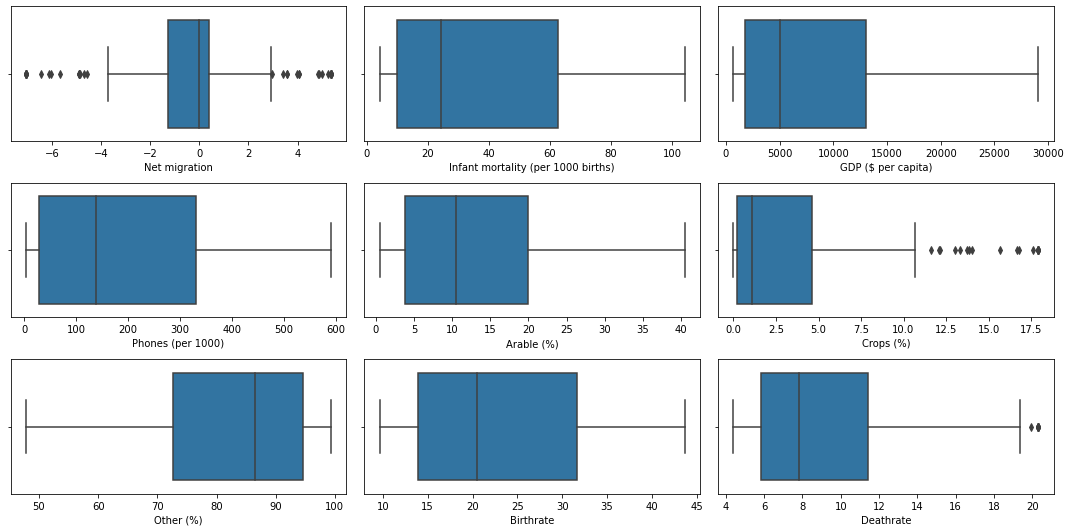

In [419]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_copy['Net migration'], ax = axs[0,0])
plt2 = sns.boxplot(df_copy['Infant mortality (per 1000 births)'], ax = axs[0,1])
plt3 = sns.boxplot(df_copy['GDP ($ per capita)'], ax = axs[0,2])
plt4 = sns.boxplot(df_copy['Phones (per 1000)'], ax = axs[1,0])
plt5 = sns.boxplot(df_copy['Arable (%)'], ax = axs[1,1])
plt6 = sns.boxplot(df_copy['Crops (%)'], ax = axs[1,2])
plt7 = sns.boxplot(df_copy['Other (%)'], ax = axs[2,0])
plt8 = sns.boxplot(df_copy['Birthrate'], ax = axs[2,1])
plt9 = sns.boxplot(df_copy['Deathrate'], ax = axs[2,2])

plt.tight_layout()

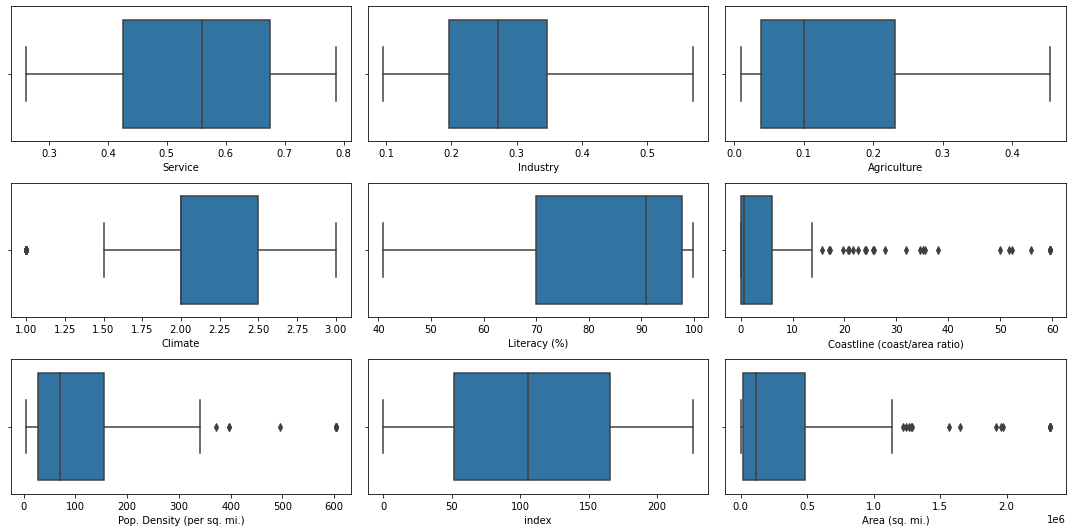

In [420]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_copy['Service'], ax = axs[0,0])
plt2 = sns.boxplot(df_copy['Industry'], ax = axs[0,1])
plt3 = sns.boxplot(df_copy['Agriculture'], ax = axs[0,2])
plt4 = sns.boxplot(df_copy['Climate'], ax = axs[1,0])
plt5 = sns.boxplot(df_copy['Literacy (%)'], ax = axs[1,1])
plt6 = sns.boxplot(df_copy['Coastline (coast/area ratio)'], ax = axs[1,2])
plt7 = sns.boxplot(df_copy['Pop. Density (per sq. mi.)'], ax = axs[2,0])
plt8 = sns.boxplot(df_copy['index'], ax = axs[2,1])
plt9 = sns.boxplot(df_copy['Area (sq. mi.)'], ax = axs[2,2])

plt.tight_layout()

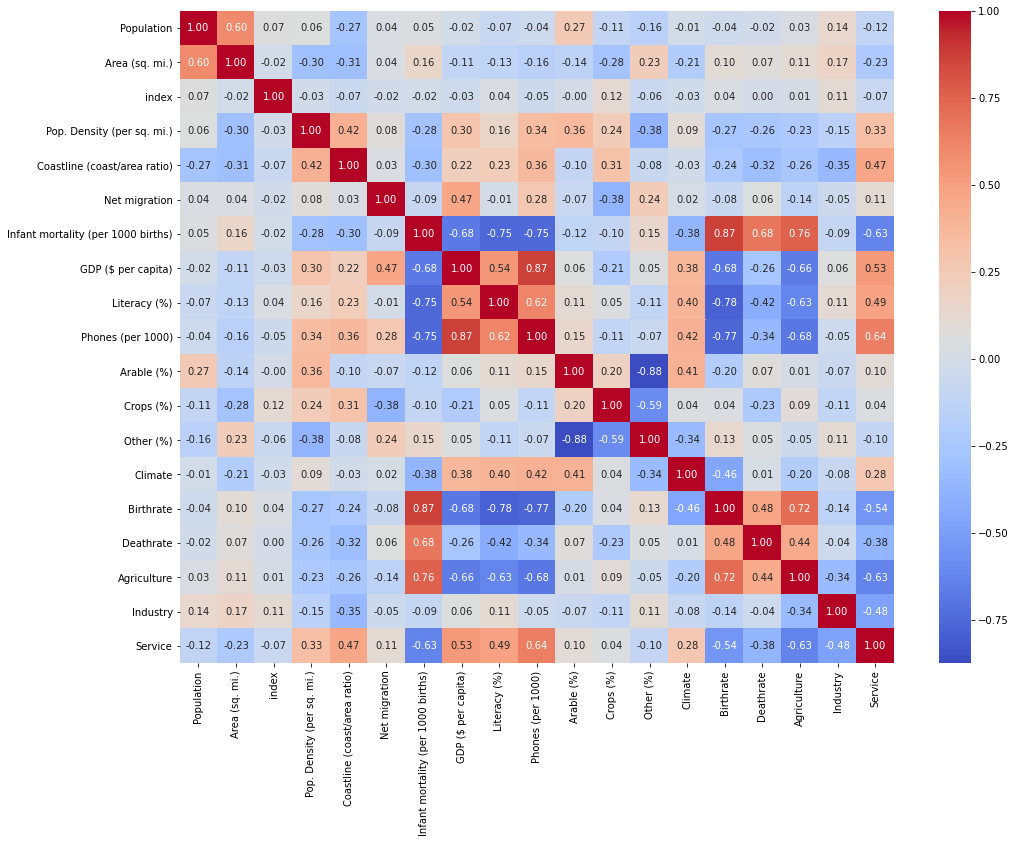

In [421]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_copy.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?*Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [422]:
from sklearn import preprocessing

In [423]:
le = preprocessing.LabelEncoder()
df_copy["Country"] = le.fit_transform(df_copy["Country"])
df_copy["Region"] = le.fit_transform(df_copy["Region"])
df_copy

,Country,Region,Population,Area (sq. mi.),index,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997.0,647500.0,0,48.0,0.000,5.3635,104.0895,700.0,...,3.405,12.1300,0.22,87.6500,1.0,43.662,20.3195,0.380,0.24000,0.380
1,1,3,3581655.0,28748.0,1,124.6,1.260,-4.9300,21.5200,4500.0,...,71.200,21.0900,4.42,74.4900,3.0,15.110,5.2200,0.232,0.18800,0.579
2,2,6,32930091.0,2326767.0,2,13.8,0.040,-0.3900,31.0000,6000.0,...,78.100,3.2200,0.25,96.5300,1.0,17.140,4.6100,0.101,0.56955,0.298
6,3,4,68919.9,302.2,6,132.1,59.611,5.3635,21.0300,8600.0,...,460.000,0.4815,0.00,99.3375,2.0,14.170,5.3400,0.040,0.18000,0.780
7,4,4,69108.0,443.0,7,156.0,34.540,-6.1500,19.4600,11000.0,...,549.900,18.1800,4.55,77.2700,2.0,16.930,5.3700,0.038,0.22000,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,177,4,25730435.0,912050.0,218,28.2,0.310,-0.0400,22.2000,4800.0,...,140.100,2.9500,0.92,96.1300,2.0,18.710,4.9200,0.040,0.41900,0.541
219,178,0,84402966.0,329560.0,219,256.1,1.050,-0.4500,25.9500,2500.0,...,187.700,19.9700,5.95,74.0800,2.0,16.860,6.2200,0.209,0.41000,0.381
224,179,5,21456188.0,527970.0,224,40.6,0.360,0.0000,61.5000,800.0,...,37.200,2.7800,0.24,96.9800,1.0,42.890,8.3000,0.135,0.47200,0.393
225,180,9,11502010.0,752614.0,225,15.3,0.000,0.0000,88.2900,800.0,...,8.200,7.0800,0.03,92.9000,2.0,41.000,19.9300,0.220,0.29000,0.489


In [425]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = df_copy.columns
# Scale these variables using 'fit_transform'
df_copy[varlist] = scaler.fit_transform(df_copy[varlist])
df_copy


,Country,Region,Population,Area (sq. mi.),index,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-1.722560,-1.612542,0.443182,0.401614,-1.650490,-0.540250,-0.505264,1.986712,2.060460,-0.906035,...,-1.033502,-0.112220,-0.671350,0.379331,-1.708421,1.919943,2.459606,1.715938,-0.348858,-1.159514
1,-1.703526,-0.733852,-0.528120,-0.603545,-1.635364,-0.034661,-0.427823,-1.602105,-0.499196,-0.486207,...,-0.679115,0.660531,0.133360,-0.484689,1.440263,-0.721466,-0.900247,0.609840,-0.767629,0.159557
2,-1.684492,0.144839,0.509399,3.129572,-1.620238,-0.765983,-0.502806,-0.019239,-0.205315,-0.320486,...,-0.643047,-0.880658,-0.665602,0.962348,-1.708421,-0.533666,-1.035981,-0.369206,2.305104,-1.703051
6,-1.665459,-0.440955,-0.652302,-0.649755,-1.559733,0.014842,3.158493,1.986712,-0.514386,-0.033235,...,1.353268,-1.116838,-0.713501,1.146674,-0.134079,-0.808427,-0.873546,-0.825097,-0.832055,1.491886
7,-1.646425,-0.440955,-0.652295,-0.649526,-1.544607,0.172591,1.617602,-2.027456,-0.563056,0.231919,...,1.823204,0.409559,0.158268,-0.302168,-0.134079,-0.553093,-0.866870,-0.840045,-0.509924,1.246632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.646425,-0.440955,0.254878,0.831373,1.646999,-0.670938,-0.486211,0.102788,-0.478116,-0.453063,...,-0.318953,-0.903944,-0.537232,0.936086,-0.134079,-0.388422,-0.967002,-0.825097,1.092681,-0.092326
219,1.665459,-1.612542,2.329055,-0.114878,1.662125,0.833289,-0.440730,-0.040158,-0.361866,-0.707169,...,-0.070132,0.563937,0.426505,-0.511608,-0.134079,-0.559569,-0.677733,0.437947,1.020202,-1.152886
224,1.684492,-0.148058,0.103776,0.207438,1.737756,-0.589093,-0.483138,0.116734,0.740185,-0.894986,...,-0.856844,-0.918605,-0.667518,0.991892,-1.708421,1.848524,-0.214904,-0.115102,1.519506,-1.073344
225,1.703526,1.023530,-0.248122,0.572371,1.752882,-0.756083,-0.505264,0.116734,1.570675,-0.894986,...,-1.008437,-0.547754,-0.707753,0.724020,-0.134079,1.673676,2.372937,0.520157,0.053807,-0.437008


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

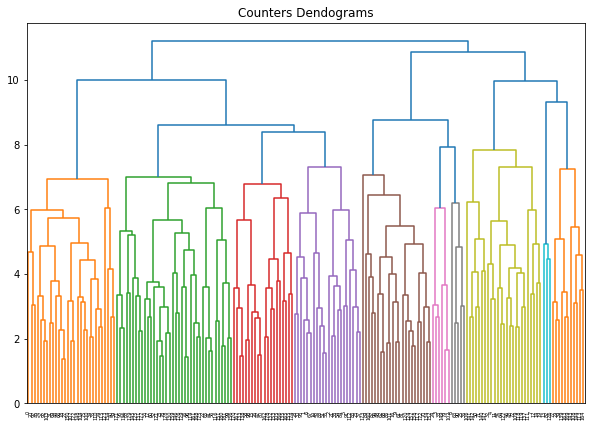

In [428]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy , method="complete", metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
plt.show()

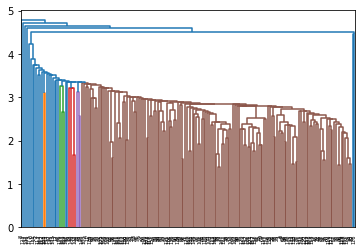

In [429]:
dend = shc.dendrogram(shc.linkage(y=df_copy , method="single", metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
plt.show()

In [431]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df_copy)
clustering.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [432]:
min_max_scaler = preprocessing.MinMaxScaler()
varlist = df_copy.columns
# Scale these variables using 'fit_transform'
df_copy[varlist] = min_max_scaler.fit_transform(df_copy[varlist])
df_copy

,Country,Region,Population,Area (sq. mi.),index,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.000000,0.0,0.291018,0.278189,0.000000,0.071773,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.290976,0.012268,0.773296,0.0,1.000000,1.000000,0.832286,0.303866,0.226018
1,0.005525,0.3,0.032989,0.012227,0.004425,0.199958,0.021137,0.172648,0.172841,0.133826,...,0.115390,0.514794,0.246473,0.518030,1.0,0.160495,0.051450,0.500224,0.194022,0.604777
2,0.011050,0.6,0.308609,1.000000,0.008850,0.014542,0.000671,0.537556,0.267809,0.186653,...,0.127134,0.068407,0.013941,0.945543,0.0,0.220182,0.013129,0.206305,1.000000,0.069947
6,0.016575,0.4,0.000000,0.000000,0.026549,0.212509,1.000000,1.000000,0.167932,0.278218,...,0.777143,0.000000,0.000000,1.000000,0.5,0.132856,0.058988,0.069441,0.177123,0.987343
7,0.022099,0.4,0.000002,0.000061,0.030973,0.252504,0.579423,0.074589,0.152204,0.362740,...,0.930157,0.442103,0.253722,0.571954,0.5,0.214007,0.060873,0.064954,0.261618,0.916920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.977901,0.4,0.240995,0.391903,0.964602,0.038640,0.005200,0.565687,0.179653,0.144392,...,0.232660,0.061662,0.051302,0.937784,0.5,0.266344,0.032604,0.069441,0.681981,0.532451
219,0.983425,0.0,0.792006,0.141527,0.969027,0.420014,0.017614,0.532733,0.217219,0.063391,...,0.313678,0.486817,0.331791,0.510077,0.5,0.211949,0.114270,0.448620,0.662970,0.227922
224,0.988950,0.5,0.200854,0.226811,0.991150,0.059390,0.006039,0.568902,0.573350,0.003522,...,0.057520,0.057416,0.013383,0.954271,0.0,0.977301,0.244935,0.282589,0.793937,0.250761
225,0.994475,0.9,0.107372,0.323371,0.995575,0.017052,0.000000,0.568902,0.841725,0.003522,...,0.008161,0.164829,0.001673,0.875131,0.5,0.921730,0.975532,0.473300,0.409485,0.433479


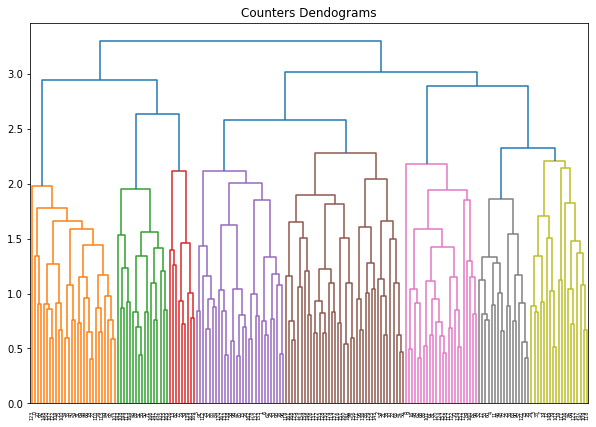

In [433]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy , method="complete", metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
plt.show()

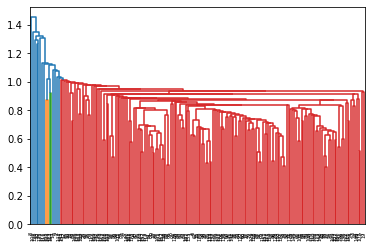

In [434]:
dend = shc.dendrogram(shc.linkage(y=df_copy , method="single", metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
plt.show()

In [493]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(df_copy)
clustering.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [494]:
silhouette_score(df_copy, clustering.labels_)

0.19670948296056492

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 